<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Graficar_D%C3%ADas_Epecificos_Febrero_21_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
tag='piura'
#tag='cuzco'
#tag='Huancayo'
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/Compendio/S4-"+tag+"-marzo-2021.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [46]:
tag='Piura'
#tag='Cuzco'
#tag='Huancayo'
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/Compendio/S4%20"+tag+"%20Feb-2021.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [47]:
s4['date_time'] = pd.to_datetime(s4['Año']*1000+s4['Day'], format='%y%j')+pd.Series([pd.Timedelta(seconds=x) for x in s4['Tiempo']])-pd.Timedelta(hours=5)

s4.head(20)

,Año,Day,Tiempo,PRN,S4,Az,Elv,date_time
0,21,32,44,1,0.12,30.0,21.8,2021-01-31 19:00:44
1,21,32,44,3,0.13,98.7,27.9,2021-01-31 19:00:44
2,21,32,44,6,0.06,221.2,45.6,2021-01-31 19:00:44
3,21,32,44,7,0.05,137.2,80.1,2021-01-31 19:00:44
4,21,32,44,9,0.12,173.6,29.4,2021-01-31 19:00:44
5,21,32,44,14,0.13,354.3,18.5,2021-01-31 19:00:44
6,21,32,44,17,0.11,316.0,27.9,2021-01-31 19:00:44
7,21,32,44,19,0.16,288.3,25.6,2021-01-31 19:00:44
8,21,32,44,22,0.14,74.9,15.2,2021-01-31 19:00:44
9,21,32,44,30,0.06,328.4,61.2,2021-01-31 19:00:44


In [48]:
# azimuth cada 15 grados
s4_clean=s4[np.isfinite(s4['S4'])]




#Filtros
s4_clean=s4_clean[s4_clean['Elv']>30]

In [49]:
from datetime import datetime
#datetime(2021, 2, 20, 00,00)
s4_21_22=s4_clean[(s4_clean.date_time > datetime(2021, 2, 21,19,0, 00,00)) & (s4_clean.date_time < datetime(2021, 2,22, 5, 00,00))]

In [50]:
s4_21_22['Hora Local']=s4_21_22.date_time 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
s4_21_22

,Año,Day,Tiempo,PRN,S4,Az,Elv,date_time,Hora Local
288682,21,53,52,6,0.09,299.8,45.3,2021-02-21 19:00:52,2021-02-21 19:00:52
288683,21,53,52,7,0.06,165.8,49.2,2021-02-21 19:00:52,2021-02-21 19:00:52
288685,21,53,52,14,0.10,10.9,37.5,2021-02-21 19:00:52,2021-02-21 19:00:52
288687,21,53,52,30,0.04,242.1,68.3,2021-02-21 19:00:52,2021-02-21 19:00:52
288688,21,53,52,138,0.04,288.1,46.5,2021-02-21 19:00:52,2021-02-21 19:00:52
...,...,...,...,...,...,...,...,...,...
294391,21,53,35932,138,0.06,288.2,46.5,2021-02-22 04:58:52,2021-02-22 04:58:52
294394,21,53,35992,18,0.05,339.5,59.8,2021-02-22 04:59:52,2021-02-22 04:59:52
294397,21,53,35992,25,0.06,152.5,48.6,2021-02-22 04:59:52,2021-02-22 04:59:52
294398,21,53,35992,29,0.09,192.8,44.0,2021-02-22 04:59:52,2021-02-22 04:59:52


In [ ]:
s4_21_22 = s4_21_22.set_index('date_time')
s4mean=s4_21_22.resample('4min').mean()

In [45]:
Cuzco=s4_21_22

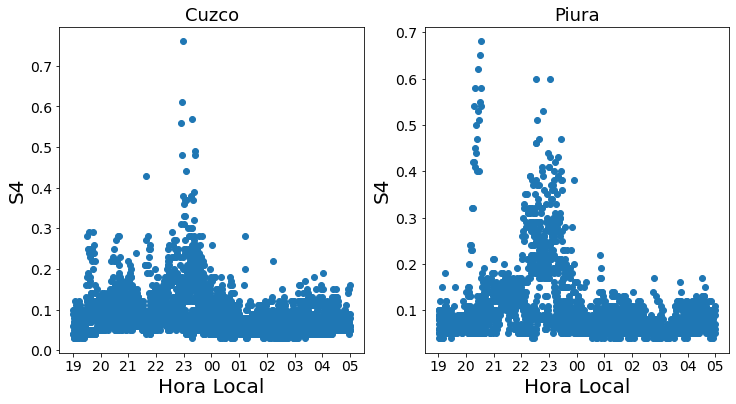

In [59]:
from google.colab import files


import matplotlib.dates as mdates

fig, ax1 = plt.subplots(1,2,figsize=(12,6))

color = 'tab:olive'
ax1[0].set_xlabel('Hora Local', fontsize=20)
#ax1.set_ylabel('Kpx10', color=color,fontsize=20)
ax1[0].set_ylabel('S4',fontsize=20)

lns1 = ax1[0].scatter(Cuzco['Hora Local'],Cuzco['S4']) #ax1.plot(kp_series,color=color, label='Kpx10')#.plot()

ax1[0].tick_params(axis='x',labelsize=14)
#ax1.format_xdata = mdates.DateFormatter('%m-%d')
#ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
myFmt = mdates.DateFormatter('%H')
ax1[0].xaxis.set_major_formatter(myFmt)
#ax1.set_ylim(0,2)
#ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax1[0].tick_params(axis='y',labelsize=14)

ax1[0].set_title("Cuzco",size=18)


ax1[1].set_xlabel('Hora Local', fontsize=20)
#ax1.set_ylabel('Kpx10', color=color,fontsize=20)
ax1[1].set_ylabel('S4',fontsize=20)

lns1 = ax1[1].scatter(s4_21_22['Hora Local'],s4_21_22['S4']) #ax1.plot(kp_series,color=color, label='Kpx10')#.plot()

ax1[1].tick_params(axis='x',labelsize=14)
#ax1.format_xdata = mdates.DateFormatter('%m-%d')
#ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
myFmt = mdates.DateFormatter('%H')
ax1[1].xaxis.set_major_formatter(myFmt)
#ax1.set_ylim(0,2)
#ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax1[1].tick_params(axis='y',labelsize=14)



ax1[1].set_title("Piura",size=18)

plt.show()

fig.savefig("figura7.pdf", bbox_inches='tight')


In [60]:
files.download('figura7.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
ls

febrero.pdf  sample_data/


In [ ]:
s4mean.describe()

,Año,Day,Tiempo,PRN,S4,Az,Elv
count,3895.0,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000
mean,21.0,37.826958,42438.091224,37.415481,0.056756,200.288257,48.837782
std,0.0,4.152690,24516.094507,6.746955,0.009084,26.856515,3.749947
min,21.0,32.000000,88.086957,24.666667,0.036250,138.243750,41.719444
25%,21.0,34.000000,21212.000000,32.142857,0.051250,181.959903,45.643168
50%,21.0,37.000000,42570.800000,37.714286,0.055000,201.883333,48.725000
75%,21.0,40.000000,63452.000000,41.500000,0.060000,221.897917,51.153399
max,21.0,46.000000,85508.000000,54.000000,0.182500,253.800000,59.800000


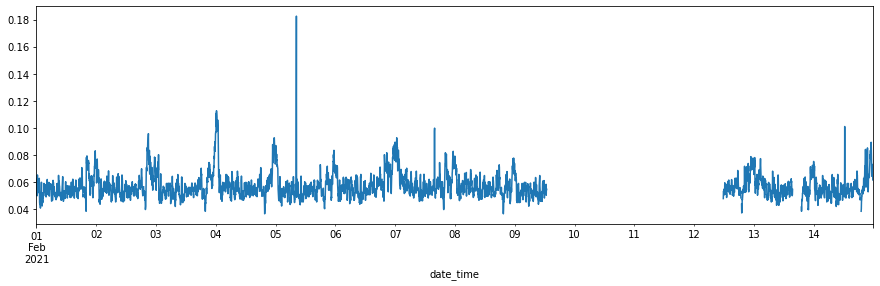

In [ ]:
s4mean['S4'].plot(figsize=(15,4))

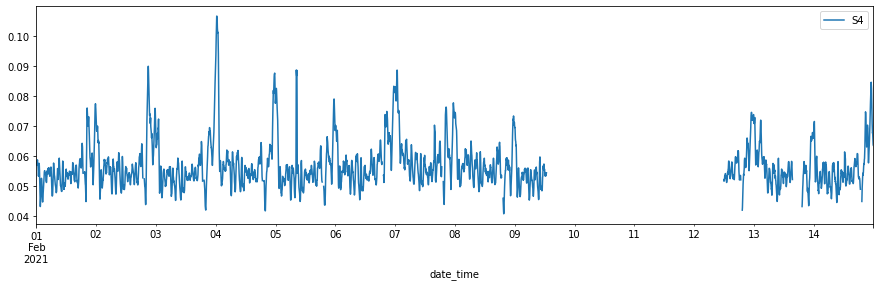

In [ ]:
s4mean[["S4"]].rolling(6).mean().plot(figsize=(15,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86ab129790>],
      dtype=object)

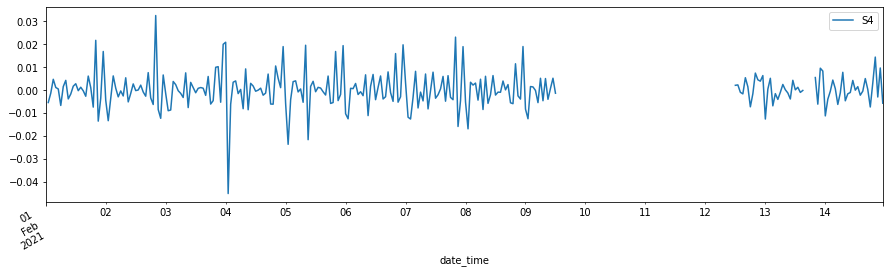

In [ ]:
s4mean[["S4"]].resample("1h").median().diff().plot(subplots=True, figsize=(15,4))

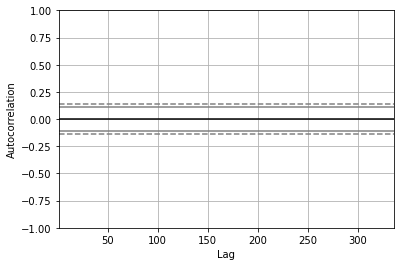

In [ ]:
pd.plotting.autocorrelation_plot(s4mean["S4"].resample("1h").mean())

NameError: ignored

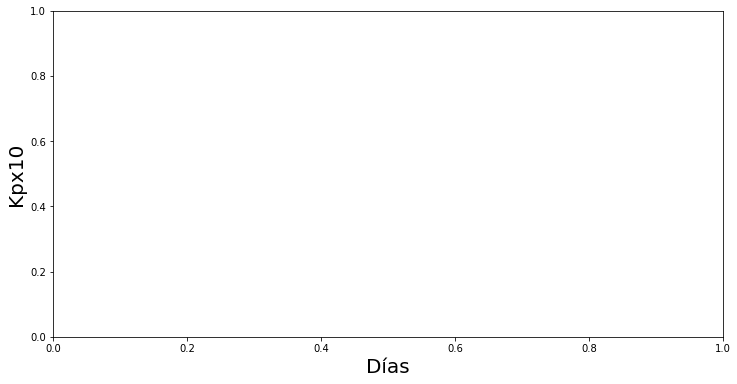

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:olive'
ax1.set_xlabel('Días', fontsize=20)
#ax1.set_ylabel('Kpx10', color=color,fontsize=20)
ax1.set_ylabel('Kpx10',fontsize=20)

lns1 = ax1.plot(kp_series,color=color, label='Kpx10')#.plot()
ax1.tick_params(axis='y', labelcolor=sorted_names[0],labelsize=20)
ax1.tick_params(axis='x',labelsize=20)
#ax1.format_xdata = mdates.DateFormatter('%m-%d')
#ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(0,90)
#ax1.tick_params(axis='y', labelcolor=color,labelsize=18)
ax1.tick_params(axis='y',labelsize=18)
x_i = mdates.date2num(F107_series.index[0])
x_f = mdates.date2num(F107_series.index[-1])
ax1.set_xlim(x_i,x_f)
#ax1.arrow(x_i, 100, 1, 0, head_width=0.05, head_starts_at_zero=False)
ax1.annotate('Tranquila', xy=(x_i, 30), xytext=(x_i+1, 30),fontsize=18,color='green',
            arrowprops=dict(facecolor='green', shrink=0.01),
            )
ax1.annotate('Activa', xy=(x_i, 50), xytext=(x_i+1, 50),fontsize=18,color='red',
            arrowprops=dict(facecolor='red', shrink=0.01),
            )
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#color = 'C0'

#ax2.set_ylabel('F10.7',color=color, fontsize=18)
ax2.set_ylabel('F10.7', fontsize=18)

#F107_series.plot()  # we already handled the x-label with ax1
lns2 = ax2.plot(F107_series,label='F10.7')
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color,labelsize=18)
ax2.tick_params(axis='y',labelsize=18)

ax2.xaxis.set_major_locator(plt.MaxNLocator(8))
#plt.title(r'Daily Averaged $Kp\times10$ and $F10.7$ Indices %s) ' %current_month, fontsize=15)
plt.title(r'Índices $Kp\times10$ y $F10.7$', fontsize=22)
#ax2.format_xdata = mdates.DateFormatter('%m-%d')
ax2.xaxis.set_major_formatter(myFmt)
ax2.set_ylim(50,250)
#F107_limit.plot()
#ax3 = ax1.twinx()
#ax3.arrow(20, 100, -1, 0, head_width=0.8, head_starts_at_zero=False)
#ax3.get_yaxis().set_visible(False)
#F107_moderate.plot(color='green', linestyle='dashed')#, marker='--')
#F107_high.plot(color='red', linestyle='dashed')#, marker='--')
#ax1.text(0, 2.1, 'head_starts_at_zero=False')
ax2.annotate('Moderada', xy=(x_f, 100), xytext=(x_f+3, 100),fontsize=18,color='green',
            arrowprops=dict(facecolor='green', shrink=0.01),
            )
ax2.annotate('Alta', xy=(x_f, 150), xytext=(x_f-3, 150),fontsize=18,color='red',
            arrowprops=dict(facecolor='red', shrink=0.01),
            )
#ax3 = ax1.twinx()
#color = 'tab:green'
#ax3.set_ylabel('F10.7=3.5',color=color, fontsize=15)
#F107_series.plot()  # we already handled the x-label with ax1
#ax3.plot(F107_limit,'g')#,label='F10.7')
#ax2.plot(t, data2, color=color)
#ax3.tick_params(axis='y', labelcolor=color,labelsize=15)
#ax3.xaxis.set_major_locator(plt.MaxNLocator(8))
#plt.axhline(y=36.5, color='b', linestyle='-')
plt.rc('legend',fontsize=15)
plt.grid(True)

leg = lns1 + lns2 #+ ln3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = dir_plots + "geomagnetic-activity-indices-%s.png" % current_month
plt.savefig(fig_name)
fig_name_pdf = dir_plots + "geomagnetic-activity-indices-%s.pdf" % current_month
plt.savefig(fig_name_pdf)